In [1]:
import pandas as pd 
import numpy as np 
from mlxtend.plotting import plot_decision_regions


In [2]:
#creating a dataset
df=pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['X3']=[1,1,0,1,0,1,0,1,0,0]

In [3]:
df

,X1,X2,X3
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

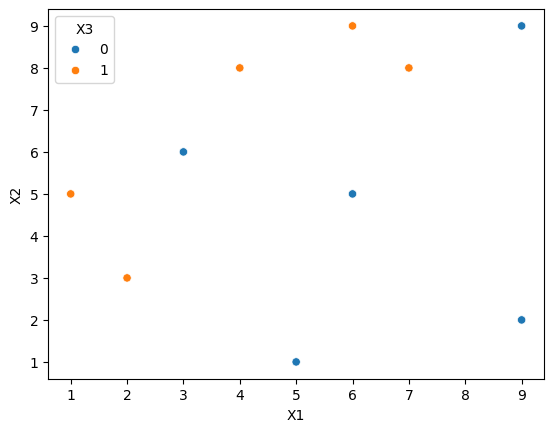

In [4]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['X3'])

In [5]:
df['weights']=1/df.shape[0]
'''
weight=1/row_numbres
'''


'\nweight=1/row_numbres\n'

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)#decision stumps
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [7]:
#step2- Train first model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

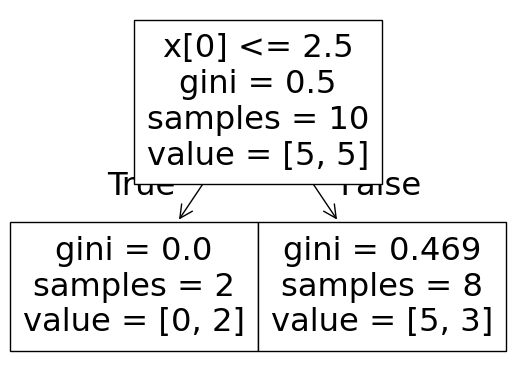

In [8]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

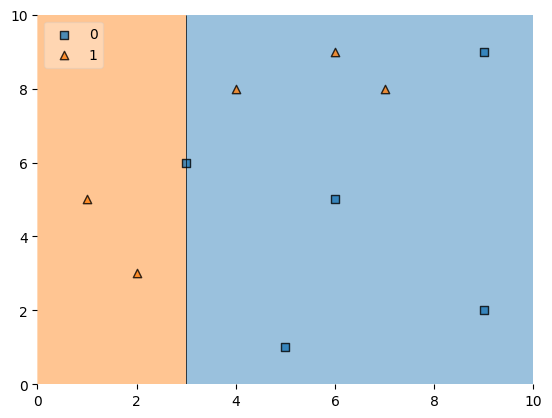

In [9]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [10]:
df['y_pred']=dt1.predict(X)#finding the predection of the values using the first decision stumps

In [11]:
df

,X1,X2,X3,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [12]:
def calculate_model_weight(error):#calculating the weight
    ''' 
    formula is 
    error=0.5*ln(1-error/error)
    '''
    return 0.5*np.log((1-error)/error+0.001)


In [ ]:
#step3-calculating model weight
alpha1 = calculate_model_weight((df['X3'] != df['y_pred']).mean())
alpha1

np.float64(0.4238631700026355)

In [14]:
#step4-update weights
def update_row_weights(row,alpha=1.09):
    if row['X3']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
    '''
    The exponentail function allows for the better model to 
    give high weight to incorrectly classified data.
    The bad model will take very large time.
    '''

In [ ]:
df['updated_weight'] = df.apply(lambda row: update_row_weights(row, alpha=alpha1), axis=1)

In [16]:
df

,X1,X2,X3,weights,y_pred,updated_weight
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
3,4,8,1,0.1,0,0.297427
4,5,1,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622
7,7,8,1,0.1,0,0.297427
8,9,9,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622


In [17]:
df['updated_weight'].sum()

np.float64(1.1276337673636332)

In [18]:
df['noramlized_weight']=df['updated_weight']/df['updated_weight'].sum()

In [19]:
df

,X1,X2,X3,weights,y_pred,updated_weight,noramlized_weight
0,1,5,1,0.1,1,0.033622,0.029816
1,2,3,1,0.1,1,0.033622,0.029816
2,3,6,0,0.1,0,0.033622,0.029816
3,4,8,1,0.1,0,0.297427,0.263762
4,5,1,0,0.1,0,0.033622,0.029816
5,6,9,1,0.1,0,0.297427,0.263762
6,6,5,0,0.1,0,0.033622,0.029816
7,7,8,1,0.1,0,0.297427,0.263762
8,9,9,0,0.1,0,0.033622,0.029816
9,9,2,0,0.1,0,0.033622,0.029816


In [20]:
df['noramlized_weight'].sum()

np.float64(1.0)

In [ ]:
df['cumsum_upper']=np.cumsum(df['noramlized_weight'])#to calcualte the upper range of the normalized weight
df['cumsum_lower']=df['cumsum_upper']-df['noramlized_weight']#lower range of the norsmalized weight


In [22]:
df

,X1,X2,X3,weights,y_pred,updated_weight,noramlized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.033622,0.029816,0.029816,0.000000
1,2,3,1,0.1,1,0.033622,0.029816,0.059632,0.029816
2,3,6,0,0.1,0,0.033622,0.029816,0.089448,0.059632
3,4,8,1,0.1,0,0.297427,0.263762,0.353211,0.089448
4,5,1,0,0.1,0,0.033622,0.029816,0.383027,0.353211
5,6,9,1,0.1,0,0.297427,0.263762,0.646789,0.383027
6,6,5,0,0.1,0,0.033622,0.029816,0.676605,0.646789
7,7,8,1,0.1,0,0.297427,0.263762,0.940368,0.676605
8,9,9,0,0.1,0,0.033622,0.029816,0.970184,0.940368
9,9,2,0,0.1,0,0.033622,0.029816,1.000000,0.970184


In [23]:
import random#for the random number generation

In [24]:
def create_new_dataset(df):
    row = df.shape[0]
    x_list = [random.random() for _ in range(row)]  # Generate random numbers between 0 and 1
    indices = []
    for num in x_list:
        for i in range(len(df)):
            if num >= df.iloc[i]['cumsum_lower'] and num < df.iloc[i]['cumsum_upper']:
                indices.append(i)
                break  # Add break to avoid duplicate indices
    return indices

In [25]:
index_values=create_new_dataset(df)

In [26]:
index_values

[3, 7, 3, 3, 7, 0, 3, 5, 6, 3]

In [27]:
second_df=df.iloc[index_values,[0,1,2,3]]#created new dataset


In [28]:
second_df#the weights will be reintialized in the new dataset

,X1,X2,X3,weights
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1


In [29]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [30]:
dt2=DecisionTreeClassifier(max_depth=1)

In [31]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [32]:
second_df['y_pred']=dt2.predict(second_df[['X1','X2']])

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


[Text(0.5, 0.75, 'x[1] <= 6.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.625, 0.5, '  False')]

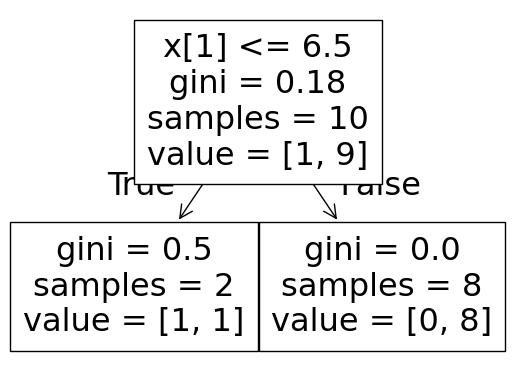

In [33]:
plot_tree(dt2)

<Axes: >

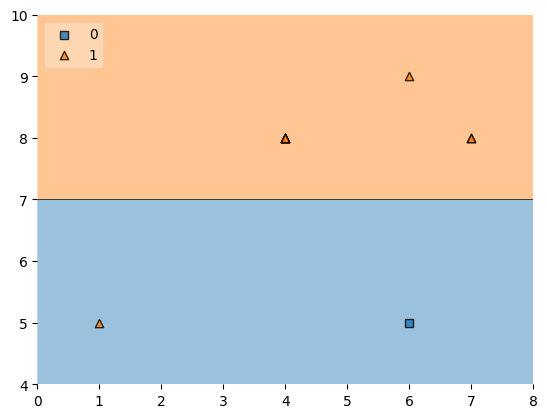

In [34]:
plot_decision_regions(X,y,clf=dt2,legend=2)#plotting decision tree for the decision tree boundaries

In [ ]:
alpha2 = calculate_model_weight((second_df['X3'] != second_df['y_pred']).mean())

In [36]:
alpha2

np.float64(1.0986678411374742)

In [ ]:
second_df['updated_weight'] = second_df.apply(lambda row: update_row_weights(row, alpha=alpha2), axis=1)

In [38]:
second_df

,X1,X2,X3,weights,y_pred,updated_weight
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
0,1,5,1,0.1,0,0.297427
3,4,8,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622


In [39]:
second_df['noramlized_weight']=second_df['updated_weight']/second_df['updated_weight'].sum()

In [40]:
second_df

,X1,X2,X3,weights,y_pred,updated_weight,noramlized_weight
3,4,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,0,0.297427,0.495694
3,4,8,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034


In [41]:
second_df['cumsum_upper']=np.cumsum(second_df['noramlized_weight'])#to calcualte the upper range of the normalized weight
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['noramlized_weight']#lower range of the normalized weight


In [42]:
index_values=create_new_dataset(second_df)

In [43]:
index_values

[4, 9, 5, 3, 5, 4, 9, 5, 5, 0]

In [44]:
third_df=second_df.iloc[index_values,[0,1,2,3]]

In [45]:
third_df

,X1,X2,X3,weights
7,7,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1


In [ ]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

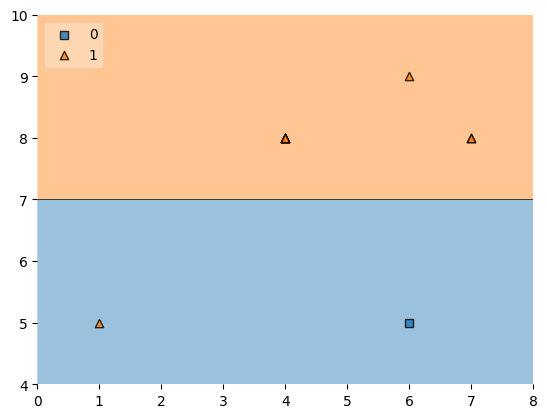

In [47]:

plot_decision_regions(X, y, clf=dt3, legend=2)

In [ ]:


X_third = third_df.iloc[:,0:2].values
third_df['y_pred'] = dt3.predict(X_third)

In [49]:
third_df

,X1,X2,X3,weights,y_pred
7,7,8,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,1
0,1,5,1,0.1,1
7,7,8,1,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,0
3,4,8,1,0.1,1


In [ ]:

alpha3 = calculate_model_weight((third_df['X3'] != third_df['y_pred']).mean())
alpha3

np.float64(0.6932721649375491)

## **Prediction**

In [58]:
query=np.array([1,5]).reshape(1,2)

In [53]:
dt1.predict(query)

array([1])

In [54]:
dt2.predict(query)

array([0])

In [55]:
dt3.predict(query)

array([0])

In [ ]:
# Get individual predictions
pred1 = dt1.predict(query)[0]
pred2 = dt2.predict(query)[0] 
pred3 = dt3.predict(query)[0]

# Convert to {-1, +1} for AdaBoost formula
pred1_adaboost = 2*pred1 - 1
pred2_adaboost = 2*pred2 - 1
pred3_adaboost = 2*pred3 - 1

# Calculate weighted prediction
final_prediction = alpha1*pred1_adaboost + alpha2*pred2_adaboost + alpha3*pred3_adaboost
final_class = 1 if final_prediction > 0 else 0

print(f"Individual predictions: {pred1}, {pred2}, {pred3}")
print(f"Final weighted prediction: {final_prediction:.3f}")
print(f"Final class: {final_class}")

np.float64(-1.3680768360723876)

In [57]:
np.sign(-1.368)

np.float64(-1.0)